In [11]:
"""
Random Forest
Global Feature Selection 
    - X = 'Depth (m)', 'σ,v (kPa)', 'σ',v (kPa)', 'SBT (-)', 'SBTn (-)',
    'Mod. SBTn (-)', 'Oberhollenzer_classes', 'iso_classes_encoded'.

    
    - Y = 'qc (MPa)','fs (kPa)'.

Link: https://github.com/DowellChan/ResNetRegression
"""
#General Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, CSVLogger
from sklearn.model_selection import train_test_split
import time

'''
PreProcessing
''' 
#Loading Database
df_cpt=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Target_Encoded_Database.csv')

#Transforming to DataFrame
df_cpt = pd.DataFrame(df_cpt)
df_cpt = df_cpt.drop(columns='Unnamed: 0')

#Dropping zeros from qc
df_cpt = df_cpt[~(df_cpt[['qc (MPa)']] == 0).any(axis = 1)]
df_cpt = df_cpt[~(df_cpt[['qc (MPa)']] < 0).any(axis = 1)]
df_cpt = df_cpt[~(df_cpt[['SBT (-)']] == 0).any(axis = 1)]
df_cpt = df_cpt[~(df_cpt[['SBTn (-)']] == 0).any(axis = 1)]
df_cpt = df_cpt[~(df_cpt[['Mod. SBTn (-)']] == 0).any(axis = 1)]

#Transforming to NumpyArray
df_cpt = df_cpt.to_numpy()

'''
Inputs
'''
X = df_cpt[:, [11, 17, 18, 19, 27]]

#1 --> 'Depth (m)' --> index: 1
#2 --> 'σ,v (kPa)' --> index: 9
#3 --> "σ',v (kPa)" --> index: 11
#4 --> 'SBT (-)' --> index: 17
#5 --> 'SBTn (-)' --> index: 18
#6 --> 'Mod. SBTn (-)' --> index: 19 
#7 --> 'Ic (-)' --> index: 21
#8 --> 'Ic SBT (-)' --> index:22 
#9 --> 'Ib (-)' --> index: 23
#10 --> 'Oberhollenzer_classes' --> index: 24
#11 --> 'iso_classes_encoded' --> index: 27

#X=X.to(device) #To GPU

'''
Outputs
'''
y = df_cpt[:, [2, 3]] 

#1 --> 'qc (MPa)' --> index: 2
#2 --> 'fs (kPa)' --> index: 3

#y=y.to(device) #To GPU

#Scaling the and preparing the data
#scalerX = MinMaxScaler()
#scalerY = MinMaxScaler()

#Scaling the Data
#scaledX=scalerX.fit_transform(X)
#scaledY=scalerY.fit_transform(y)

#Train & Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.20)

In [13]:
#Loading Database
df_cpt=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Target_Encoded_Database.csv')

#Transforming to DataFrame
df_cpt = pd.DataFrame(df_cpt)
df_cpt.columns

Index(['Unnamed: 0', 'ID', 'Depth (m)', 'qc (MPa)', 'fs (kPa)', 'u2 (kPa)',
       'Vs (m/s)', 'qt (MPa)', 'Rf (%)', 'γ (kN/m³)', 'σ,v (kPa)', 'u0 (kPa)',
       'σ',v (kPa)', 'Qt (-)', 'Qtn (-)', 'Fr (%)', 'Bq (-)', 'U2 (-)',
       'SBT (-)', 'SBTn (-)', 'Mod. SBTn (-)', 'n', 'Ic (-)', 'Ic SBT (-)',
       'Ib (-)', 'Oberhollenzer_classes', 'test_type_encoded',
       'basin_valley_encoded', 'iso_classes_encoded'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#Random forest Model
model = RandomForestRegressor(bootstrap = True, n_estimators = 400, max_depth = 300,
                              min_samples_split = 15, min_samples_leaf = 2)


#Initial time
start_time = time.time()

#Fitting the model
model.fit(X_train, y_train)

#Final time
end_time = (time.time() - start_time)
print('The running time is: %.2f minutes' %(end_time/60))

The running time is: 15.69 minutes


In [ ]:
#Making a prediction
y_pred = model.predict(X_test)

In [ ]:
# #Metrics Global
# print('Metrics Global')
# mae = mean_absolute_error(y_test, y_pred)
# print('The mae is: %.4f' %mae)
# mse = mean_squared_error(y_test, y_pred)
# print('The mse is: %.4f' %mse)
# rmse = np.sqrt(mse).mean()
# print('The rmse is: %.4f' %rmse)
# r2 = r2_score(y_test, y_pred)
# print('The R2 is: %.4f' %r2)

# print('____________________________________________')
# #Metrics for the qc
# print('Metrics for qc')
# mae_qc = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
# print('The mae is: %.4f MPa' %mae_qc)
# mse_qc = mean_squared_error(y_test[:, 0], y_pred[:, 0])
# print('The mse is: %.4f MPa' %mse_qc)
# rmse_qc = np.sqrt(mse).mean()
# print('The rmse is: %.4f MPa' %rmse_qc)
# r2_qc = r2_score(y_test[:, 0], y_pred[:, 0])
# print('The R2 is: %.4f MPa' %r2_qc)
# mean_absolute_error(y_test[:, 0], y_pred[:, 0])

# print('____________________________________________')

# #Metrics for the fs
# print('Metrics for fs')
# mae_fs = mean_absolute_error(y_test[:, 1], y_pred[:, 1])
# print('The mae is: %.4f kPa' %mae_fs)
# mse_fs = mean_squared_error(y_test[:, 1], y_pred[:, 1])
# print('The mse is: %.4f kPa' %mse_fs)
# rmse_fs = np.sqrt(mse_fs).mean()
# print('The rmse is: %.4f kPa' %rmse_fs)
# r2_fs= r2_score(y_test[:, 1], y_pred[:, 1])
# print('The R2 is: %.4f kPa' %r2_fs)

# print('____________________________________________')
# print(mean_absolute_error(y_test[:, 0], y_pred[:, 0]))
# print(mean_absolute_error(y_test[:, 1], y_pred[:, 1]))

Metrics Global
The mae is: 7.2697
The mse is: 451.7713
The rmse is: 21.2549
The R2 is: 0.8700
____________________________________________
Metrics for qc
The mae is: 0.8585 MPa
The mse is: 5.5950 MPa
The rmse is: 21.2549 MPa
The R2 is: 0.9174 MPa
____________________________________________
Metrics for fs
The mae is: 13.6810 kPa
The mse is: 897.9476 kPa
The rmse is: 29.9658 kPa
The R2 is: 0.8225 kPa
____________________________________________
0.8584633518167738
13.6810223064707


In [ ]:
#Metrics Global
print('Metrics Global')
mae = mean_absolute_error(y_test, y_pred)
mape = (mae / np.mean(y_test)) * 100
print('The MAPE is: %.2f%%' %mape)
mse = mean_squared_error(y_test, y_pred)
print('The mse is: %.4f' %mse)
rmse = np.sqrt(mse).mean()
print('The rmse is: %.4f' %rmse)
r2 = r2_score(y_test, y_pred)
print('The R2 is: %.4f' %r2)

print('____________________________________________')

#Metrics for the qc
print('Metrics for qc')
mae_qc = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
mape_qc = (mae_qc / np.mean(y_test[:, 0])) * 100
print('The MAPE is: %.2f%%' %mape_qc)
mse_qc = mean_squared_error(y_test[:, 0], y_pred[:, 0])
print('The mse is: %.4f MPa' %mse_qc)
rmse_qc = np.sqrt(mse).mean()
print('The rmse is: %.4f MPa' %rmse_qc)
r2_qc = r2_score(y_test[:, 0], y_pred[:, 0])
print('The R2 is: %.4f MPa' %r2_qc)

print('____________________________________________')

#Metrics for the fs
print('Metrics for fs')
mae_fs = mean_absolute_error(y_test[:, 1], y_pred[:, 1])
mape_fs = (mae_fs / np.mean(y_test[:, 1])) * 100
print('The MAPE is: %.2f%%' %mape_fs)
mse_fs = mean_squared_error(y_test[:, 1], y_pred[:, 1])
print('The mse is: %.4f kPa' %mse_fs)
rmse_fs = np.sqrt(mse_fs).mean()
print('The rmse is: %.4f kPa' %rmse_fs)
r2_fs= r2_score(y_test[:, 1], y_pred[:, 1])
print('The R2 is: %.4f kPa' %r2_fs)

Metrics Global
The MAPE is: 23.50%
The mse is: 451.7713
The rmse is: 21.2549
The R2 is: 0.8700
____________________________________________
Metrics for qc
The MAPE is: 16.32%
The mse is: 5.5950 MPa
The rmse is: 21.2549 MPa
The R2 is: 0.9174 MPa
____________________________________________
Metrics for fs
The MAPE is: 24.17%
The mse is: 897.9476 kPa
The rmse is: 29.9658 kPa
The R2 is: 0.8225 kPa


________________________________________________________________________________
Trainning Metrics
________________________________________________________________________________

In [10]:
#Making a prediction
# y_pred = model.predict(X_train)
#Metrics Global
print('Metrics Global')
mae = mean_absolute_error(y_train, y_pred)
mape = (mae / np.mean(y_train)) * 100
print('The MAPE is: %.2f%%' %mape)
mse = mean_squared_error(y_train, y_pred)
print('The mse is: %.4f' %mse)
rmse = np.sqrt(mse).mean()
print('The rmse is: %.4f' %rmse)
r2 = r2_score(y_train, y_pred)
print('The R2 is: %.4f' %r2)

print('____________________________________________')

#Metrics for the qc
print('Metrics for qc')
mae_qc = mean_absolute_error(y_train[:, 0], y_pred[:, 0])
mape_qc = (mae_qc / np.mean(y_train[:, 0])) * 100
print('The MAPE is: %.2f%%' %mape_qc)
mse_qc = mean_squared_error(y_train[:, 0], y_pred[:, 0])
print('The mse is: %.4f MPa' %mse_qc)
rmse_qc = np.sqrt(mse).mean()
print('The rmse is: %.4f MPa' %rmse_qc)
r2_qc = r2_score(y_train[:, 0], y_pred[:, 0])
print('The R2 is: %.4f MPa' %r2_qc)

print('____________________________________________')

#Metrics for the fs
print('Metrics for fs')
mae_fs = mean_absolute_error(y_train[:, 1], y_pred[:, 1])
mape_fs = (mae_fs / np.mean(y_train[:, 1])) * 100
print('The MAPE is: %.2f%%' %mape_fs)
mse_fs = mean_squared_error(y_train[:, 1], y_pred[:, 1])
print('The mse is: %.4f kPa' %mse_fs)
rmse_fs = np.sqrt(mse_fs).mean()
print('The rmse is: %.4f kPa' %rmse_fs)
r2_fs= r2_score(y_train[:, 1], y_pred[:, 1])
print('The R2 is: %.4f kPa' %r2_fs)

Metrics Global
The MAPE is: 19.10%
The mse is: 296.8905
The rmse is: 17.2305
The R2 is: 0.9118
____________________________________________
Metrics for qc
The MAPE is: 13.95%
The mse is: 3.9920 MPa
The rmse is: 17.2305 MPa
The R2 is: 0.9405 MPa
____________________________________________
Metrics for fs
The MAPE is: 19.57%
The mse is: 589.7890 kPa
The rmse is: 24.2856 kPa
The R2 is: 0.8831 kPa


________________________________________________________________________________
Saving Model
________________________________________________________________________________

In [ ]:
'''
Saving the Model
'''
import joblib

#Saving model as joblib file
import os
joblib.dump(model, 'CPT_RF_02_88_compress.joblib', compress = 3)
print(f"Compressed Random Forest: {np.round(os.path.getsize('CPT_RF_02_88_compress.joblib') / 1024 / 1024, 2) } MB")

________________________________________________________________________________
Plotting Metrics
________________________________________________________________________________

In [ ]:
'''
Plots
'''
# 'qc (MPa)' 
fig, ax = plt.subplots()

#Add the text
textstr = '\n'.join((r'r2 qc = %.2f' % (r2_qc), r'MAE qc = %.2f MPa' % (mae_qc, ),r'MSE qc = %.2f MPa' % (mse_qc, ), 
                     r'RMSE qc = %.2f MPa' % (rmse_qc, )))

p1 = max(max(y_pred[:, 0]), max(y_test[:, 0]))
p2 = min(min(y_pred[:, 0]), min(y_test[:, 0]))
ax.plot([p1, p2], [p1, p2], 'k-', lw = 1)
ax.scatter(y_test[:, 0], y_pred[:, 0], s = .1, c = 'mediumorchid', marker = '.')
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel('Observed - qc (MPa)', fontsize = 12)
ax.set_ylabel('Predicted - qc (MPa)', fontsize = 12)
props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)
ax.text(1, 85,  textstr, horizontalalignment = 'left', verticalalignment = 'top', fontsize = 10, bbox = props)
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.tick_params(axis = 'both', which='major', labelsize = 12)
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.grid(False)
ax.axis('scaled') #Scaling the plot
fig.tight_layout()
plt.savefig('Metrics_qc_testing.png', dpi = 600)

(0.0, 80.0)

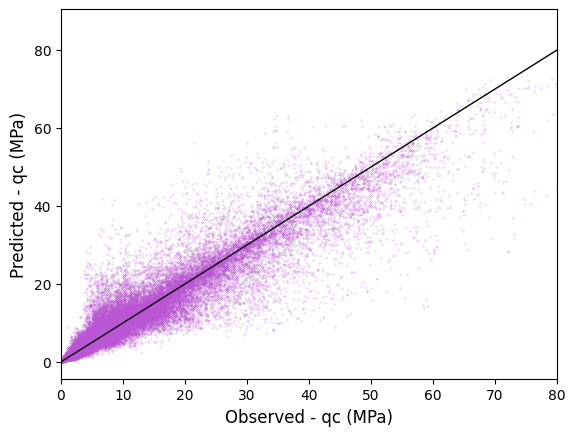

In [7]:
'''
Plots
'''
# 'qc (MPa)' 
fig, ax = plt.subplots()

#Add the text
textstr = '\n'.join((r'r2 qc = %.2f' % (r2_qc), r'MAE qc = %.2f MPa' % (mae_qc, ),r'MSE qc = %.2f MPa' % (mse_qc, ), 
                     r'RMSE qc = %.2f MPa' % (rmse_qc, )))

p1 = max(max(y_pred[:, 0]), max(y_test[:, 0]))
p2 = min(min(y_pred[:, 0]), min(y_test[:, 0]))
ax.plot([p1, p2], [p1, p2], 'k-', lw = 1)
ax.scatter(y_test[:, 0], y_pred[:, 0], s = .1, c = 'mediumorchid', marker = '.')
ax.set_xlabel('Observed - qc (MPa)', fontsize = 12)
ax.set_ylabel('Predicted - qc (MPa)', fontsize = 12)
ax.set_xlim(0, 80)

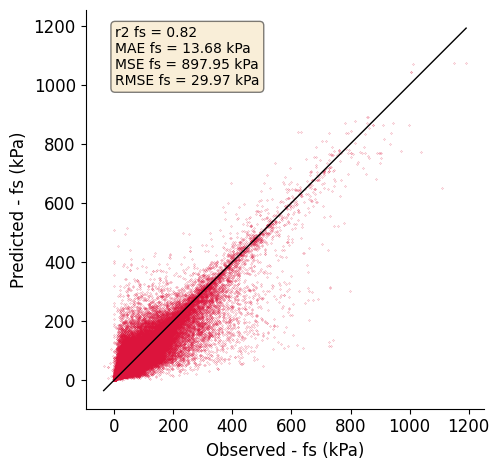

In [8]:
# 'fs (kPa)' 
fig, ax = plt.subplots()


#Add the text
textstr = '\n'.join((r'r2 fs = %.2f' % (r2_fs), r'MAE fs = %.2f kPa' % (mae_fs, ),r'MSE fs = %.2f kPa' % (mse_fs, ), 
                     r'RMSE fs = %.2f kPa' % (rmse_fs, )))

p1 = max(max(y_pred[:, 1]), max(y_test[:, 1]))
p2 = min(min(y_pred[:, 1]), min(y_test[:, 1]))
ax.plot([p1, p2], [p1, p2], 'k-', lw = 1)
ax.scatter(y_test[:, 1], y_pred[:, 1], s = .1, c = 'crimson', marker = '.')
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel('Observed - fs (kPa)', fontsize = 12)
ax.set_ylabel('Predicted - fs (kPa)', fontsize = 12)
props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)
ax.text(3, 1200,  textstr, horizontalalignment = 'left', verticalalignment = 'top', fontsize = 10, bbox = props)
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.tick_params(axis = 'both', which='major', labelsize = 12)
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.axis('scaled') #Scaling the plot
ax.grid(False)
fig.tight_layout()
plt.savefig('Metrics_fs_testing.png', dpi = 600)

In [ ]:
import seaborn as sns
# Plotting the residuals of y and pred_y
sns.residplot(y,y_pred, color='#01B6B7')
plt.title('Model Residuals')
plt.xlabel('Obsevation #')
plt.ylabel('Error');

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats
resids = y - y_pred
sm.qqplot(resids, stats.t, fit=True, line="45")